In [2]:
# The code was removed by Watson Studio for sharing.

## Data exploration

In [3]:
import math
import numpy as np
import datetime
import h5py
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.python.framework import ops
import tensorflow.contrib.learn as tflearn
import tensorflow.contrib.layers as tflayers
from tensorflow.contrib.learn.python.learn import learn_runner
import tensorflow.contrib.metrics as metrics
import tensorflow.contrib.rnn as rnn


# sort samples chronologicaly from oldest to most recent
avocado=avocado.sort_values(by='Date')

print('Number of samples: ', avocado.shape[0] )
print('Types of avocado: ', avocado['type'].unique())
print("Year: ", avocado['year'].unique())
print("Regions: ", avocado['region'].unique())
avocado

Number of samples:  18249
Types of avocado:  ['organic' 'conventional']
Year:  [2015 2016 2017 2018]
Regions:  ['Southeast' 'Chicago' 'HarrisburgScranton' 'Pittsburgh' 'Boise'
 'WestTexNewMexico' 'LosAngeles' 'LasVegas' 'Atlanta' 'DallasFtWorth'
 'MiamiFtLauderdale' 'Plains' 'StLouis' 'Syracuse' 'Midsouth' 'Sacramento'
 'Boston' 'Charlotte' 'Spokane' 'Albany' 'Houston' 'SouthCarolina'
 'SanFrancisco' 'TotalUS' 'RaleighGreensboro' 'BuffaloRochester'
 'NorthernNewEngland' 'GrandRapids' 'Denver' 'SanDiego'
 'BaltimoreWashington' 'Roanoke' 'RichmondNorfolk' 'Northeast'
 'SouthCentral' 'GreatLakes' 'Louisville' 'Seattle' 'CincinnatiDayton'
 'NewYork' 'NewOrleansMobile' 'Indianapolis' 'Jacksonville' 'Columbus'
 'Detroit' 'Philadelphia' 'PhoenixTucson' 'Nashville' 'Portland'
 'HartfordSpringfield' 'Tampa' 'Orlando' 'West' 'California']


,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
11569,51,2015-01-04,1.75,27365.89,9307.34,3844.81,615.28,13598.46,13061.10,537.36,0.00,organic,2015,Southeast
9593,51,2015-01-04,1.49,17723.17,1189.35,15628.27,0.00,905.55,905.55,0.00,0.00,organic,2015,Chicago
10009,51,2015-01-04,1.68,2896.72,161.68,206.96,0.00,2528.08,2528.08,0.00,0.00,organic,2015,HarrisburgScranton
1819,51,2015-01-04,1.52,54956.80,3013.04,35456.88,1561.70,14925.18,11264.80,3660.38,0.00,conventional,2015,Pittsburgh
9333,51,2015-01-04,1.64,1505.12,1.27,1129.50,0.00,374.35,186.67,187.68,0.00,organic,2015,Boise
2807,51,2015-01-04,0.75,758118.95,426878.87,147958.43,15267.89,168013.76,165202.22,2811.54,0.00,conventional,2015,WestTexNewMexico
1195,51,2015-01-04,0.85,2682159.95,1837999.65,524430.47,64225.78,255504.05,215571.80,36981.72,2950.53,conventional,2015,LosAngeles
10269,51,2015-01-04,1.50,6329.83,3730.80,2141.91,0.00,457.12,426.67,30.45,0.00,organic,2015,LasVegas
103,51,2015-01-04,1.00,435021.49,364302.39,23821.16,82.15,46815.79,16707.15,30108.64,0.00,conventional,2015,Atlanta
1143,51,2015-01-04,0.80,317861.35,134003.07,120628.37,4591.23,58638.68,58126.59,512.09,0.00,conventional,2015,LasVegas


In [4]:
# choose a specific region and type of avocado 
region='California'
type='organic'

df=avocado[['AveragePrice']][(avocado['region']==region) & (avocado['type']==type)]


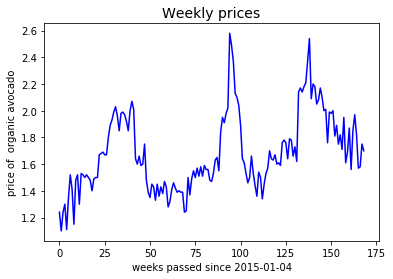

In [7]:
# plot timeseries of weekly prices
nr=df.shape[0] # number of samples

# create numpy array with weekly prices 
prices=df.iloc[:, 0:1].values

plt.title("Weekly prices", fontsize=14)

plt.plot(pd.Series(np.ravel(prices)), "b", markersize=10, label="prices")

plt.xlabel("weeks passed since 2015-01-04")
plt.ylabel("price of  organic avocado")
plt.show()


## Features

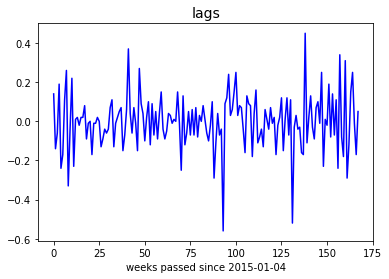

In [8]:
#obtain time series of price lags: lag i= price in week i - price in week(i+1)
# time reference, week 0: = 2015-01-04 

x_setup= prices[0:(nr-1),:]-prices[1:nr,:] # we use this timeseries to create features

plt.title("lags", fontsize=14)

plt.plot(pd.Series(np.ravel(x_setup)), "b", markersize=10, label="lags")

plt.xlabel("weeks passed since 2015-01-04")

plt.show()

In [9]:
# create non_overlapping time sequences of length window_length; 
#given a sequence, model predicts the sequence shifted forecast_window steps to the left

window_length=10 #number of timesteps in a sequence
forecast_window=1 # forecast window=1 week into the future
mini_batch=8  # length of minibatches used for training model 


remainder=(len(x_setup)-1)%window_length # values not included in the time sequences


x_train=x_setup[:(len(x_setup)-1-remainder)] # obtain non-overlapping subsequences of size window_length
x_sequences=x_train.reshape(-1, window_length,1) #reshape as a 3D tensor because of LSTM input shape requirements

num_batches=int(x_sequences.shape[0]/mini_batch) #number of minibatches of non-overlapping sequences in x_batches
x_batches=x_sequences[:mini_batch*num_batches,:,:].reshape(num_batches,mini_batch, window_length,1) #reshape as tensor


print("shape of x_batches tensor", x_batches.shape)
print("number of values not contained in x_batches: ", remainder)  
# we will use the last remainder values in x_setup for testing the model


shape of x_batches tensor (2, 8, 10, 1)
number of values not contained in x_batches:  7


In [17]:
y_train=x_setup[1:(len(x_train)+forecast_window)] # shift x_setup a number of forecast_window units to the left
y_sequences=y_train.reshape(-1,window_length,1) # split into non-overlapping subsequences of size window_length and reshaped into a 3D tensor

y_batches=y_sequences[:mini_batch*num_batches,:,:].reshape(num_batches,mini_batch, window_length,1)

print("shape of y_batches tensor", y_batches.shape)


shape of y_batches tensor (2, 8, 10, 1)


In [18]:
X_test = x_setup[-(window_length + forecast_window):-1].reshape(-1, window_length, 1)
Y_test = x_setup[-window_length:].reshape(-1, window_length, 1)
    
print ("shape of X_test: ", X_test.shape)
print ("shape of Y_test: ", Y_test.shape)


shape of X_test:  (1, 10, 1)
shape of Y_test:  (1, 10, 1)


In [19]:
#create time sequences by a sliding window method
#this time, the sequences are overlapping
X=[]
Y=[]


for i in range(window_length, x_setup.shape[0]):
    X.append(x_setup[i-window_length:i])  #at this point X and y are lists
    Y.append(x_setup[i-window_length+1: (i+1)])

    
# turn X and Y into tensors
X=np.reshape(X, (-1, window_length,1))
Y=np.reshape(Y, (-1,window_length, 1))



In [20]:
# create minibatches for training
r=X.shape[0]%mini_batch
n=int((X.shape[0]-r)/mini_batch) # number of  minibatches with overlapping timesequences

X_minibatches=np.reshape(X[:n*mini_batch,:,:], (n,mini_batch, window_length,1)) # reshape as 3D tensor for LSTM
Y_minibatches=np.reshape(Y[:n*mini_batch,:,:], (n,mini_batch, window_length,1))

print("shape of X_minibatches, Y_minibatches: ", Y_minibatches.shape)

X_remain=X[-r:,:,:] # set of sequences not contained in X_minibatches
print("number of sequences not contained in X_minibatches: ", X_remain.shape)


shape of X_minibatches, Y_minibatches:  (19, 8, 10, 1)
number of sequences not contained in X_minibatches:  (6, 10, 1)


## Model

In [31]:
# model with one LSTM layer(cell) with num_neurons neurons followed by a dense layer
tf.reset_default_graph()   

inputs = 1            #number of features at each timestep
num_neurons = 100          #number of neurons in the RNN cell
output = 1            #size of output for each feature vector at each timestep
learning_rate = 0.001

X = tf.placeholder(tf.float32, [None, window_length, inputs])  
y = tf.placeholder(tf.float32, [None, window_length, output])

# one layer with one RNN cell with number of neurons=num_neurons
basic_cell = tf.contrib.rnn.BasicLSTMCell(num_units=num_neurons, activation=tf.nn.relu)   #create our RNN with one layer with 100 cells/neurons
rnn_output, states = tf.nn.dynamic_rnn(basic_cell, X, dtype=tf.float32)               #choose dynamic over static
# rnn_output = tensor of size [batchsize, window_length, num_neurons]
# states = tensor of size [batchsize, num_neurons] containing the last nonzero output vectors for each time sequence
 
stacked_rnn_output = tf.reshape(rnn_output, [-1, num_neurons])  #change the form into a 2d tensor
# collapse each vector of size num_neurons into just one value by passing through a dense layer
stacked_outputs = tf.layers.dense(stacked_rnn_output, output)        #specify the type of layer (dense)
outputs = tf.reshape(stacked_outputs, [-1, window_length, output])          #reshape of results as 3D tensor so that it is the same shape as y 
 
loss = tf.reduce_sum(tf.square(outputs - y))    #define the cost function 
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)         
training_op = optimizer.minimize(loss)                                   

init = tf.global_variables_initializer()     

In [32]:
# we initialize sequence used for iterative forecasting
sequence = x_sequences[-1, :, :].reshape(-1).tolist() 

In [33]:
# we train the model on X_minibatches

epochs=1500
Y_train_pred=[] #this is a list of 3d tensors storing the prediction of the model for each minibatch in x_batches

with tf.Session() as sess:
    init.run()
    for ep in range(epochs):
        for i in range(n):     #number of  minibatches in X_minibatches
            
            current_batch_x= X_minibatches[i,:,:,:]
            current_batch_y= Y_minibatches[i,:,:,:]
            
            sess.run(training_op, feed_dict={X:current_batch_x, y: current_batch_y})
            
        if ep % 100 == 0: 
            mse = loss.eval(feed_dict={X: current_batch_x, y: current_batch_y})
            print(ep, "\tMSE:", mse)
            
# get predictions for x_batches to see how well the model fits the training set            
  
   
    for i in range(num_batches):   
        current_batch_x= x_batches[i,:,:,:]
        Y_train_pred.append(sess.run( outputs, feed_dict ={ X: current_batch_x})) 
        
# get predictions on test set       
    y_pred = sess.run(outputs, feed_dict={X: X_test})    # 3d tensor 
        
# iterative forecasting  to obtain predictions for the last remainder values, not included in the x_batches
    for iteration in range(remainder): 
        
        X_batch = np.array(sequence[-window_length:]).reshape(-1, window_length, 1) #select last window_length elements in sequence and reshape
        y_prediction = sess.run( outputs, feed_dict ={ X: X_batch}) #get prediction
        sequence.append( y_prediction[ 0, -1, 0]) # add current prediction to sequence

0 	MSE: 2.25185
100 	MSE: 1.5774
200 	MSE: 1.02782
300 	MSE: 0.698939
400 	MSE: 0.606414
500 	MSE: 0.510351
600 	MSE: 0.486638
700 	MSE: 0.437614
800 	MSE: 0.441573
900 	MSE: 0.439257
1000 	MSE: 0.400364
1100 	MSE: 0.35438
1200 	MSE: 0.360194
1300 	MSE: 0.341746
1400 	MSE: 0.32093


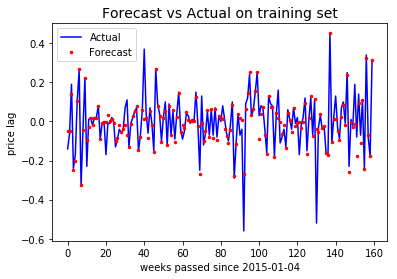

In [44]:
# see how well the model fits the training data 
# plot predictions for x_batches

pred_lag=np.reshape(Y_train_pred, (-1,1)) 
actual_lag=x_setup[forecast_window: num_batches*mini_batch*window_length+forecast_window] 

plt.title("Forecast vs Actual on training set", fontsize=14)
plt.plot(pd.Series(np.ravel(actual_lag)), "b", markersize=5, label="Actual")
plt.plot(pd.Series(np.ravel(pred_lag)), "r.", markersize=5, label="Forecast")
plt.legend(loc="upper left")
plt.xlabel("weeks passed since 2015-01-04")
plt.ylabel("price lag")
plt.show()

In [35]:
#the last remainder values in x_setup were not part of the training set; we use them for testing the model
# first, get the predictions for the last window_length values in x_setup
predicted_lag=np.reshape(y_pred, (-1,1)) # reshape y_pred(3D tensor) into a column vector 

# the last window_length values in x_setup
real_lag=x_setup[-window_length:]

#predictions for the last remainder values in x_setup, by iterative forecasting
remainder_lags=np.array(sequence[-remainder:]) 


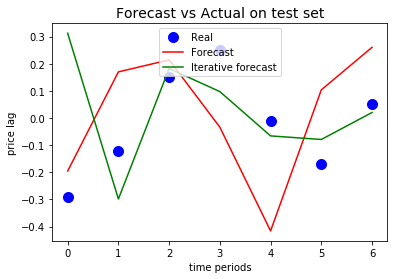

In [45]:
#compare predictions for the last remainder values in x_setup

plt.title("Forecast vs Actual on test set", fontsize=14)

plt.plot(pd.Series(np.ravel(real_lag)[-remainder:]), "bo", markersize=10, label="Real") # we get just the last remainder values in this sequence
plt.plot(pd.Series(np.ravel(predicted_lag)[-remainder:]), "r", markersize=10, label="Forecast")
plt.plot(pd.Series(np.ravel(remainder_lags)), "g", markersize=10, label="Iterative forecast")

plt.legend(loc="upper center")
plt.xlabel("time periods")
plt.ylabel("price lag")
plt.show()


### Reference 
Géron, Aurélien. Hands-On Machine Learning with Scikit-Learn and TensorFlow 